# Temperature Forecast Project using ML 

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

We need to predict the next_day min and max Temprature 

In [1]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data set
df= pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

Observation: Dataset has 7753 records and 25 attributes

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Observation: Dataset contains the only float variables 

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Data set contains the null values need to treat

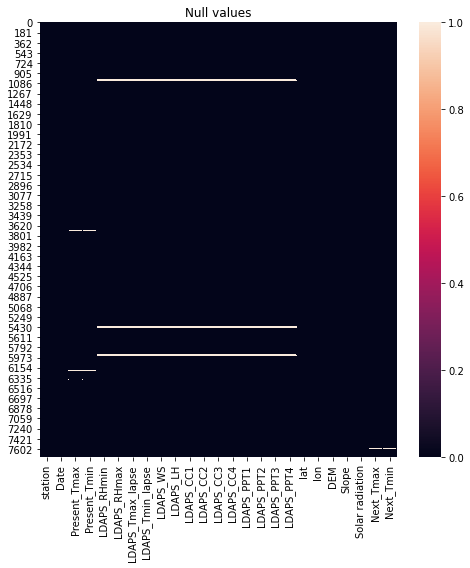

In [6]:
#Heat map to check the null values
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [7]:
#filling the null values 
df['station']=df['station'].fillna(df['station'].mode())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [8]:
# droping the unwanted date column
df.drop(['Date'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

station             2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

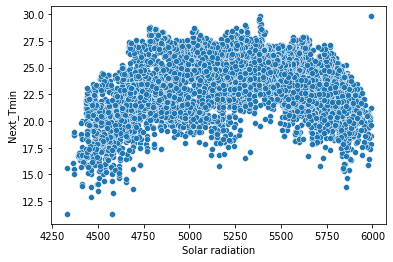

In [10]:
sns.scatterplot(df['Solar radiation'], df['Next_Tmin'])
plt.show()

Observation: We clearly see that there is outlier in the dataset 

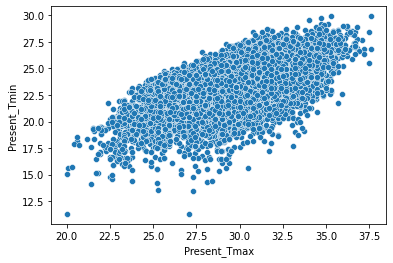

In [11]:
sns.scatterplot(df['Present_Tmax'], df['Present_Tmin'])
plt.show()

Observation : preset max and min temprature have outliers 

In [12]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [13]:
col =['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

In [15]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [16]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -1.003054
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.826395
LDAPS_WS            1.046360
LDAPS_LH            0.043811
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3          -0.118909
LDAPS_CC4          -0.032816
LDAPS_PPT1          2.726243
LDAPS_PPT2          3.090875
LDAPS_PPT3          3.625925
LDAPS_PPT4          3.904452
lat                 0.087062
lon                -0.285213
DEM                 1.152438
Slope               0.871432
Solar radiation    -0.575391
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [17]:
df.isna().sum()

station             2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            4
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [18]:
df['station']=df['station'].fillna(df['station'].mode())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

In [19]:
df.dropna(inplace=True)

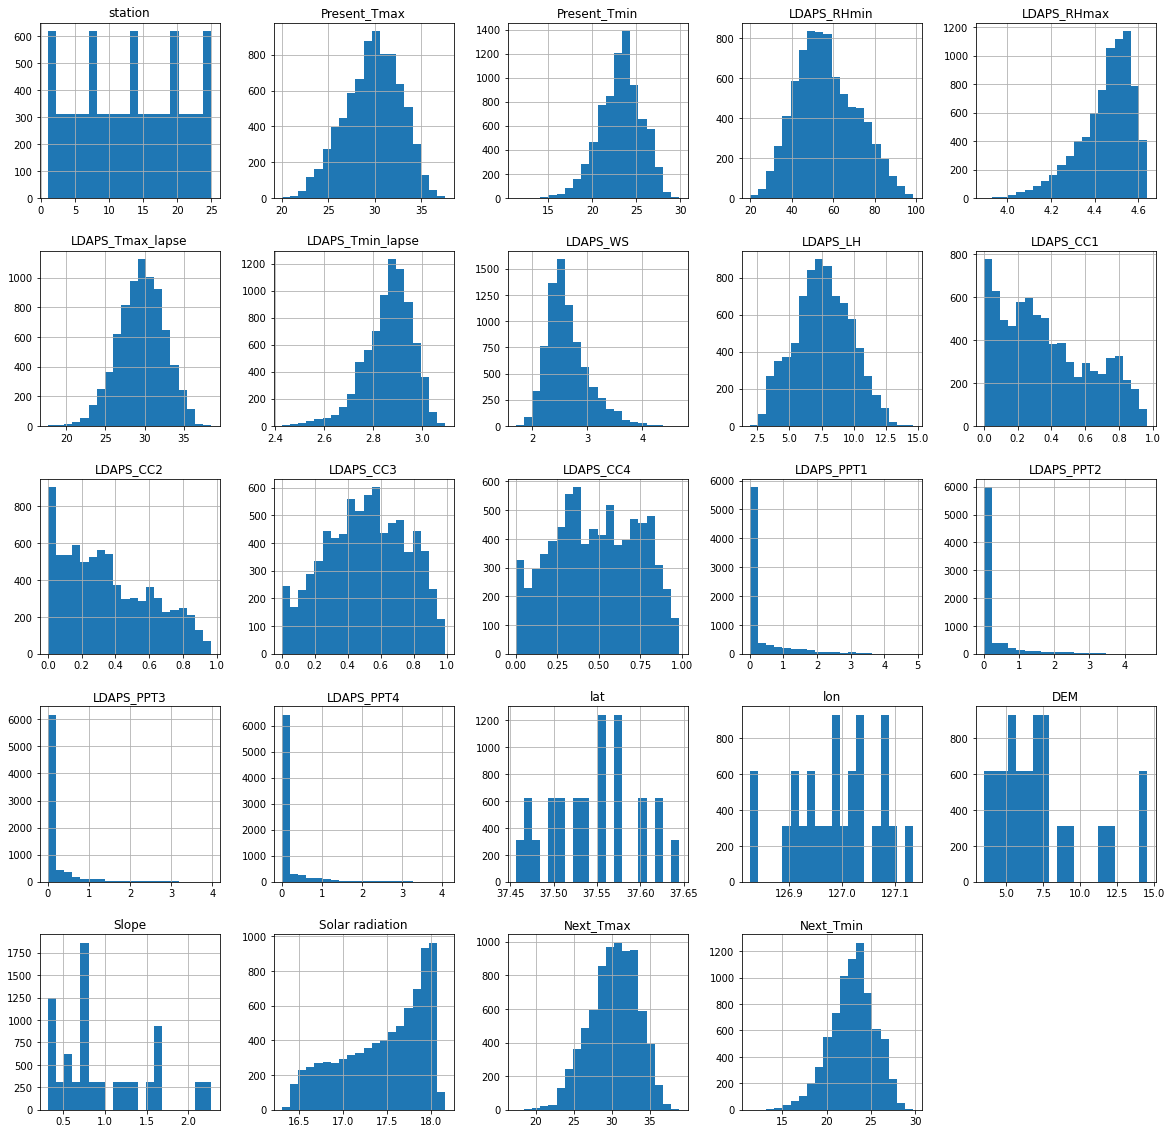

In [67]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

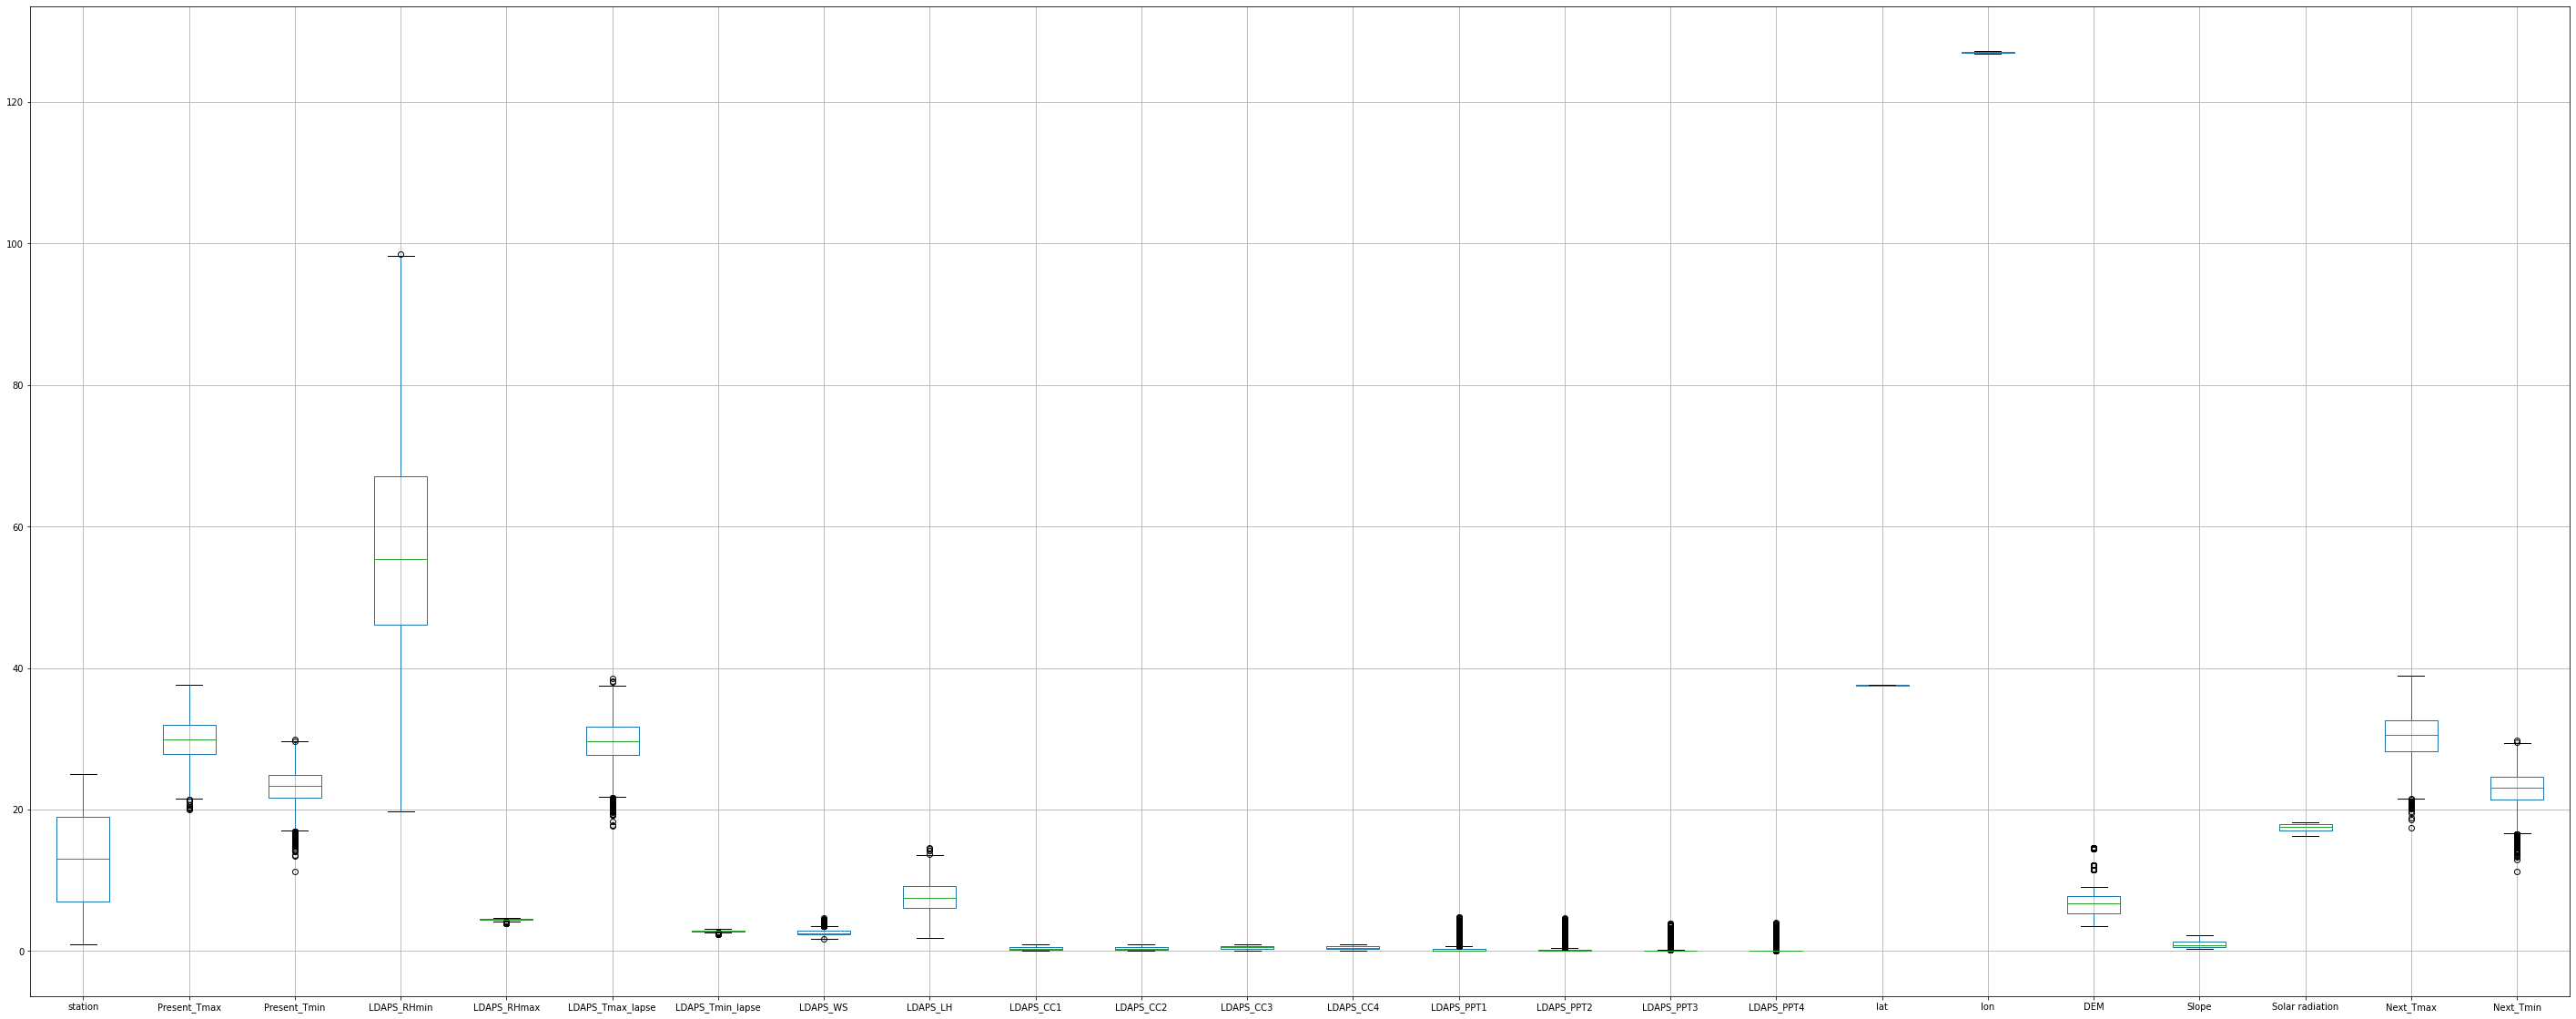

In [84]:
#plot histogram
df.boxplot(figsize=(50,20))
plt.show()

We clrealy see the some of the variables have outliers in dataset 

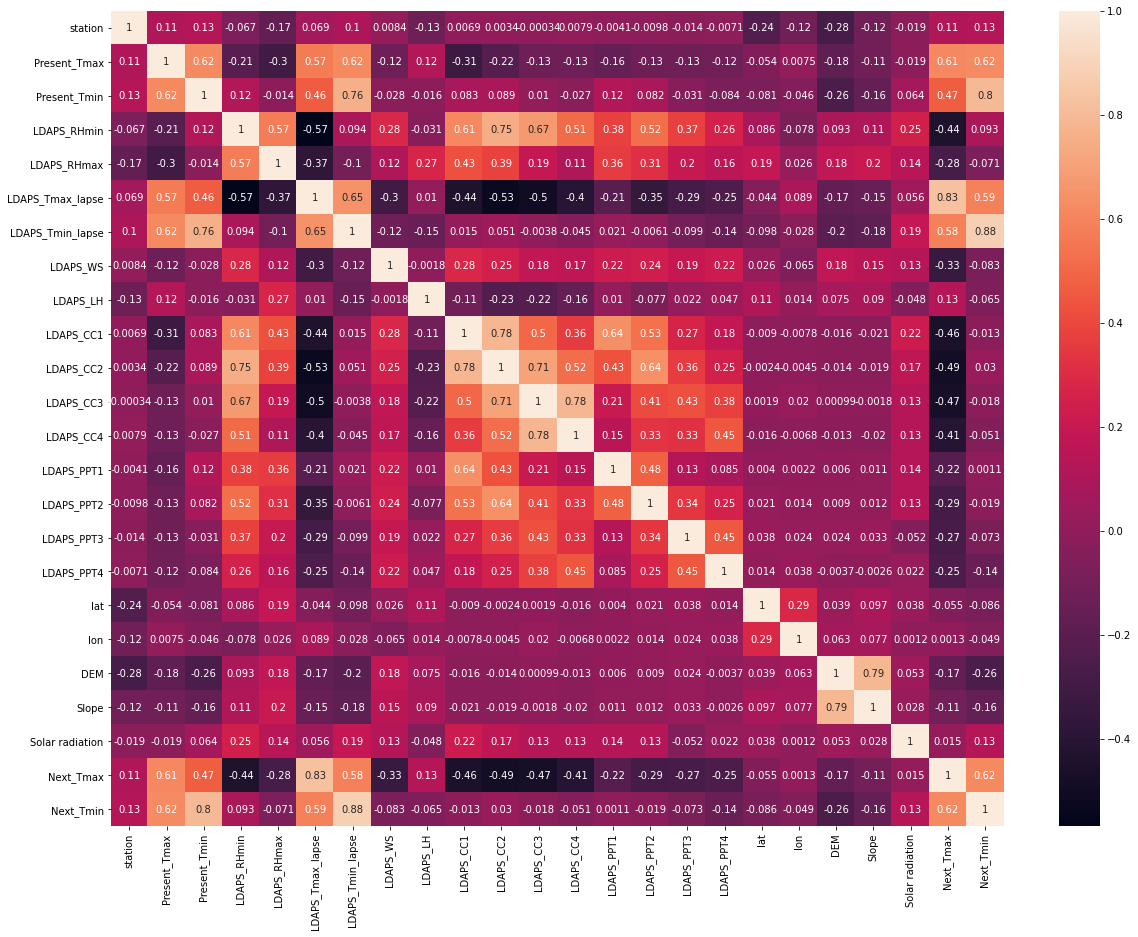

In [20]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_hmap, annot=True)
plt.show()


observation: 
1. We clearly see the Present_Tmax and next_tmin have positve corelattion 62% and Next_tmax is 61%
2. present_tmin and next_tmax 40% have positive corelation  and next_tmin 80% positive corelation
3.LADPS_Tmax_lapse and next_tmax have positive relation with 83% and next_tmin is 59% positive relation
4.LDAPS_Tmin_lapse have positive relation with next_tmax 58% with next_tmin 88%






In [21]:
#to display the
corr_matrix=df.corr()
corr_matrix['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.826628
Next_Tmin           0.620119
Present_Tmax        0.609320
LDAPS_Tmin_lapse    0.583522
Present_Tmin        0.469904
LDAPS_LH            0.130859
station             0.108155
Solar radiation     0.015483
lon                 0.001303
lat                -0.055268
Slope              -0.107222
DEM                -0.165077
LDAPS_PPT1         -0.215426
LDAPS_PPT4         -0.250894
LDAPS_PPT3         -0.272084
LDAPS_RHmax        -0.279617
LDAPS_PPT2         -0.285812
LDAPS_WS           -0.330395
LDAPS_CC4          -0.414417
LDAPS_RHmin        -0.441382
LDAPS_CC1          -0.455045
LDAPS_CC3          -0.470583
LDAPS_CC2          -0.493370
Name: Next_Tmax, dtype: float64

Observation: Independent variables Next_Tmax,LDAPS_Tmax_lapse, Next_Tmin,Present_Tmax, LDAPS_Tmin_lapse,Present_Tmin,LDAPS_LH,station, Solar radiation, have positive relation with target variables , remaining variables have negative relation 

In [22]:
#to display the
corr_matrix=df.corr()
corr_matrix['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.877745
Present_Tmin        0.795860
Present_Tmax        0.621706
Next_Tmax           0.620119
LDAPS_Tmax_lapse    0.585410
Solar radiation     0.131647
station             0.128539
LDAPS_RHmin         0.092732
LDAPS_CC2           0.029633
LDAPS_PPT1          0.001106
LDAPS_CC1          -0.012729
LDAPS_CC3          -0.018074
LDAPS_PPT2         -0.019420
lon                -0.048624
LDAPS_CC4          -0.050961
LDAPS_LH           -0.065459
LDAPS_RHmax        -0.070688
LDAPS_PPT3         -0.072596
LDAPS_WS           -0.083182
lat                -0.085509
LDAPS_PPT4         -0.142951
Slope              -0.163531
DEM                -0.255683
Name: Next_Tmin, dtype: float64

We clearly see that as air temprature decreases the tempraure of enviornment also decrease

In [104]:
#Spliting the data into Feature variables (X) and target variables (y)
x = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y = df[['Next_Tmax','Next_Tmin']]

In [105]:
#x= np.array(x).reshape((-1, 22))

In [106]:
x.shape

(7750, 22)

In [107]:

# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [108]:
print(x.shape,y.shape )

(7750, 22) (7750, 2)


In [109]:
#importing the libraries 
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(x_train, y_train)
y_pred = Regressor.predict(x_test)

In [110]:
y_pred

array([[31.5382016 , 25.52186153],
       [29.93336346, 23.66170283],
       [34.03220623, 24.95559865],
       ...,
       [29.18665865, 19.8289351 ],
       [33.03291352, 24.28585126],
       [33.61142115, 25.61440676]])

In [111]:
r_sq = Regressor.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', Regressor.intercept_)
print('coefficients:', Regressor.coef_)


coefficient of determination: 0.7882159273195164
intercept: [235.03467265  82.18975547]
coefficients: [[ 2.37126470e-02  1.46781068e-01  6.18848235e-02  2.50328079e-02
  -1.08648850e-01  6.54844171e-01  1.43057592e+00 -8.76046941e-01
   1.19621172e-01 -1.17553545e+00 -8.34238728e-01 -5.69133690e-01
  -1.10714814e+00  9.51411143e-04  3.39425088e-01 -9.53908224e-02
   1.49373784e-02 -2.71060936e-01 -1.75416840e+00 -2.28428102e-02
   2.24275777e-01  2.73271956e-02]
 [-7.11135832e-04  3.82000974e-02  2.71367155e-01  1.91541691e-02
   3.21641080e-01  1.13910937e-01  1.38874622e+01  2.29931938e-01
   2.50421361e-02 -2.32873202e-01  2.86100787e-01 -1.38097888e-01
   1.68114203e-01 -1.46421952e-01 -1.32202699e-01  6.82832617e-02
  -2.46492085e-01 -9.83051878e-01 -5.88663377e-01 -1.26647998e-01
   4.77273579e-01 -5.26007560e-02]]


In [112]:
Model = []
MMSE=[]
MSE=[]
RMSE=[]
R_Square=[]


# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE  : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model.append('Linear Regression')
R_Square.append(r_sq)
r_sq = Regressor.score(x, y)
MMSE.append(metrics.mean_absolute_error(y_test, pred))
MSE.append(metrics.mean_squared_error(y_test, pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE  :  0.9726359415518206
MSE  :  1.688496156184724
RMSE :  1.299421469802898


In [113]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,4.499858,28.074101,2.844153,2.611300,8.333775,0.233947,0.203896,0.402115,0.361840,0.0,0.0,0.0,0.0,37.6046,126.991,14.571719,1.668832,18.164032
1,2.0,31.9,21.6,52.263397,4.491419,29.850689,2.885901,2.385768,7.206764,0.225508,0.251771,0.399304,0.357390,0.0,0.0,0.0,0.0,37.6046,127.032,6.690471,0.717008,18.038306
2,3.0,31.6,23.3,48.690479,4.379060,30.091292,2.906984,2.477544,4.535752,0.209344,0.257469,0.451765,0.376995,0.0,0.0,0.0,0.0,37.5776,127.058,5.771204,0.515849,18.032406
3,4.0,32.0,23.4,58.239788,4.586534,29.704629,2.857247,2.376983,8.107228,0.216372,0.226002,0.401444,0.366400,0.0,0.0,0.0,0.0,37.6450,127.022,6.761361,1.592106,18.025647
4,5.0,31.4,21.9,56.174095,4.483978,29.113934,2.863778,2.394787,10.390647,0.151407,0.249995,0.422957,0.412336,0.0,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,18.028301


In [114]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
# make a prediction
row = [5.0,31.4,21.9,56.174095,4.483978,29.113934,2.863778,2.394787,10.390647,0.151407,0.249995,0.422957,0.412336,0.0,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,18.028301]
yhat = model.predict(x_test)
# summarize prediction
print(yhat)

[[31.2 24.2]
 [29.8 24.3]
 [33.2 25.2]
 ...
 [27.7 20.5]
 [32.4 24.8]
 [30.3 26.1]]


In [115]:
# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, yhat))
print("MSE  : ", metrics.mean_squared_error(y_test, yhat))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Model.append('DecisionTreeRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, yhat))
MSE.append(metrics.mean_squared_error(y_test, yhat))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yhat)))

MAE  :  1.0033297731288051
MSE  :  1.962360346345772
RMSE :  1.4008427271988002


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [116]:

# example of making a prediction with the direct multioutput regression model
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
model_SVR = LinearSVR()

wrapper = MultiOutputRegressor(model_SVR)
wrapper.fit(x_train, y_train)
yhat_SVR = wrapper.predict(x_test)

print('Predicted: %s' % yhat_SVR)

Model.append('SVRRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, yhat_SVR))
MSE.append(metrics.mean_squared_error(y_test, yhat_SVR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yhat_SVR)))

Predicted: [[31.59315692 26.91983106]
 [30.02995669 24.40304242]
 [33.92571953 26.03122582]
 ...
 [29.61478987 21.08342165]
 [33.21900426 25.5229589 ]
 [33.53225132 27.11620358]]


In [117]:
AccuracyTable=pd.DataFrame({'Model':Model,
                        'MMSE':MMSE,
                        'MSE': MSE, 
                        'RMSE': RMSE,
                      
                       })
AccuracyTable

,Model,MMSE,MSE,RMSE
0,Linear Regression,0.972636,1.688496,1.299421
1,DecisionTreeRegressor,1.003330,1.962360,1.400843
2,SVRRegressor,1.216771,2.437923,1.561385


In [118]:
#WE getting the higest acuracy SVR model 

from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(wrapper, 'wrapper.pkl')
  
# Load the model from the file
wrapper_joblib = joblib.load('wrapper.pkl') 
  
# Use the loaded model to make predictions
#wrapper_joblib.predict(x_test)